In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [6]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

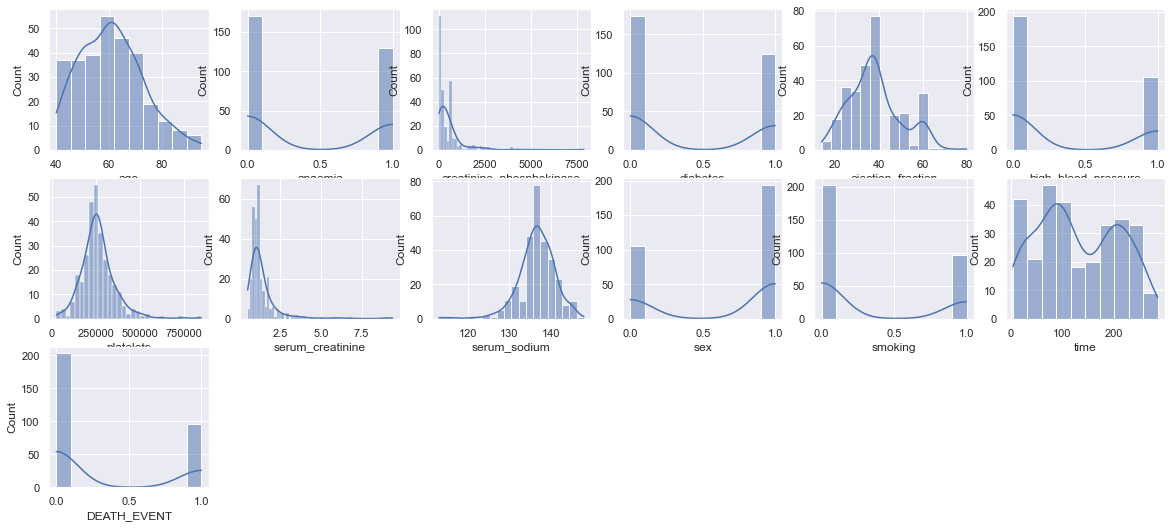

In [8]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in dataset:
    if plotnumber <=13 :
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(dataset[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

<AxesSubplot:>

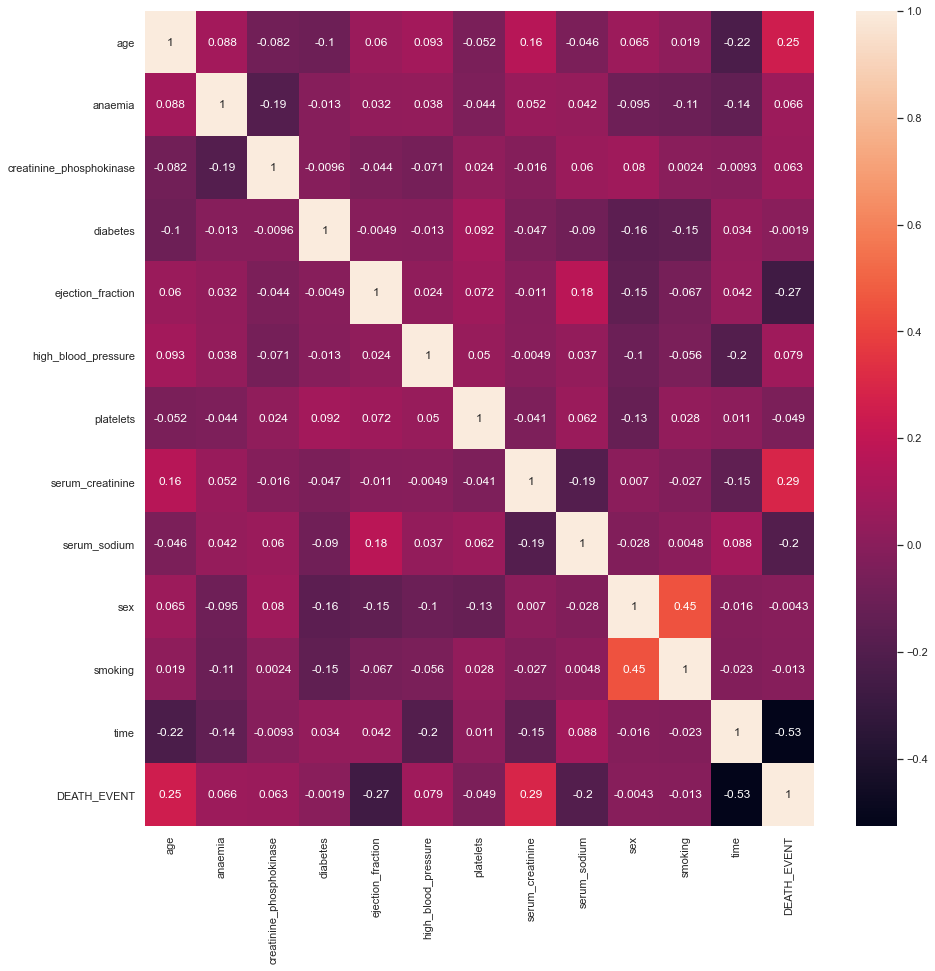

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True)

In [18]:
x = dataset[['time','ejection_fraction','serum_creatinine', 'diabetes', 'anaemia']]
y = dataset["DEATH_EVENT"]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [19]:
accuracy_list=[]

In [20]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [34]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  86.67%
